In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Importing necessary Libraries
import keras
import matplotlib.pyplot as plt
import seaborn as sn
import os
import cv2
import numpy as np
import random
from sklearn.datasets import make_multilabel_classification
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [4]:
# Load the dataset
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

data_path = "/content/drive/MyDrive/leapGestRecog Dataset"
image_data = []

for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                print(f"Error reading image: {e}")

random.shuffle(image_data)

In [5]:
# Prepare data for training
input_data = np.array([X[0] for X in image_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
label = np.array([X[1] for X in image_data])

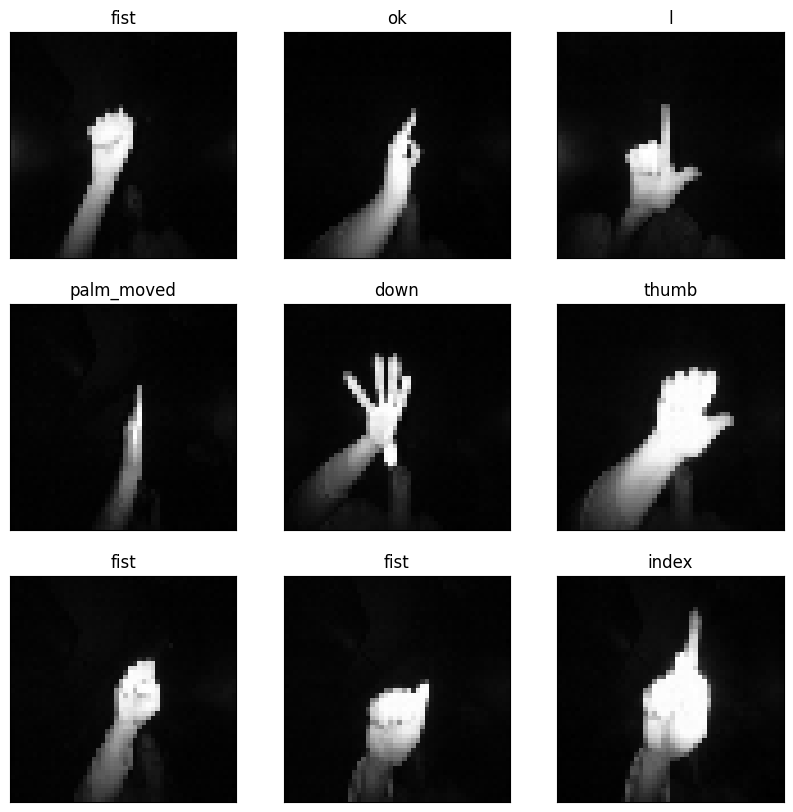

In [6]:
# Visualizing Data
plt.figure(1, figsize=(10, 10))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(image_data[i][0], cmap='gray')  # Use 'gray' colormap for grayscale images
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [7]:
# Normalizing the data
input_data = input_data / 255.0

In [8]:
# One Hot Encoding
label = keras.utils.to_categorical(label, num_classes=len(CATEGORIES), dtype='i1')

In [9]:
# Separating features and Splitting Data
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size=0.10, random_state=0)

In [10]:
# Model Definition
model = keras.models.Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(len(CATEGORIES), activation='softmax'))

In [11]:
# Model Compilation
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [12]:
# Model Training
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
565/565 [==============================] - 19s 24ms/step - loss: 0.3087 - accuracy: 0.8970 - val_loss: 0.0042 - val_accuracy: 0.9995
Epoch 2/100
565/565 [==============================] - 8s 15ms/step - loss: 0.0155 - accuracy: 0.9956 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 3/100
565/565 [==============================] - 7s 13ms/step - loss: 0.0074 - accuracy: 0.9977 - val_loss: 4.5793e-05 - val_accuracy: 1.0000
Epoch 4/100
565/565 [==============================] - 10s 17ms/step - loss: 0.0039 - accuracy: 0.9991 - val_loss: 3.6178e-04 - val_accuracy: 1.0000
Epoch 5/100
565/565 [==============================] - 9s 16ms/step - loss: 0.0037 - accuracy: 0.9992 - val_loss: 8.1190e-04 - val_accuracy: 0.9995
Epoch 6/100
565/565 [==============================] - 8s 15ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 4.2786e-04 - val_accuracy: 0.9995
Epoch 7/100
565/565 [==============================] - 10s 17ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 2.6

In [13]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                        

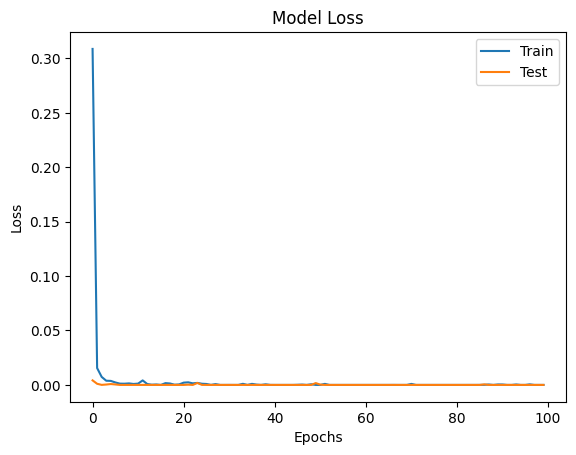

In [14]:
# Plot Model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

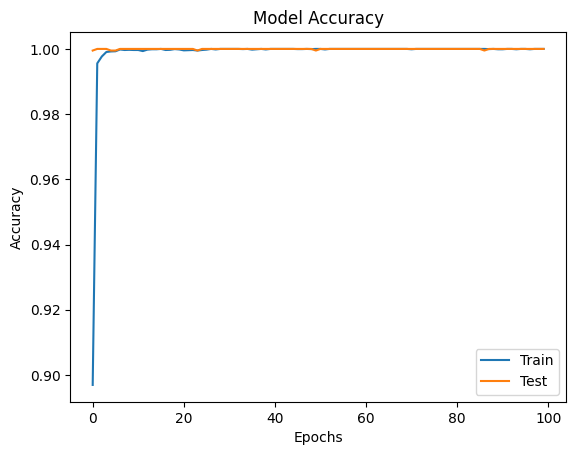

In [15]:
# Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

In [16]:
# Evaluate Model on Test Data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: {:.2f}%'.format(test_accuracy * 100))

63/63 [==============================] - 0s 3ms/step - loss: 7.3021e-09 - accuracy: 1.0000
Test accuracy: 100.00%


In [17]:
# Evaluate Model on Train Data
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print('Train accuracy: {:.2f}%'.format(train_accuracy * 100))

565/565 [==============================] - 5s 9ms/step - loss: 3.6284e-10 - accuracy: 1.0000
Train accuracy: 100.00%


63/63 [==============================] - 0s 4ms/step


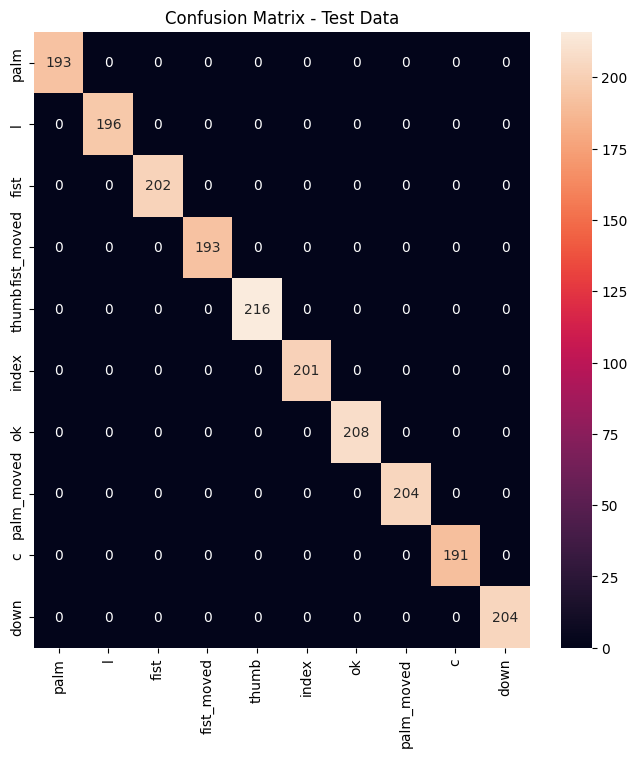

In [18]:
# Confusion Matrix for Test Data
categories = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(8, 8))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True, fmt='d', xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix - Test Data')
plt.show()

565/565 [==============================] - 4s 7ms/step


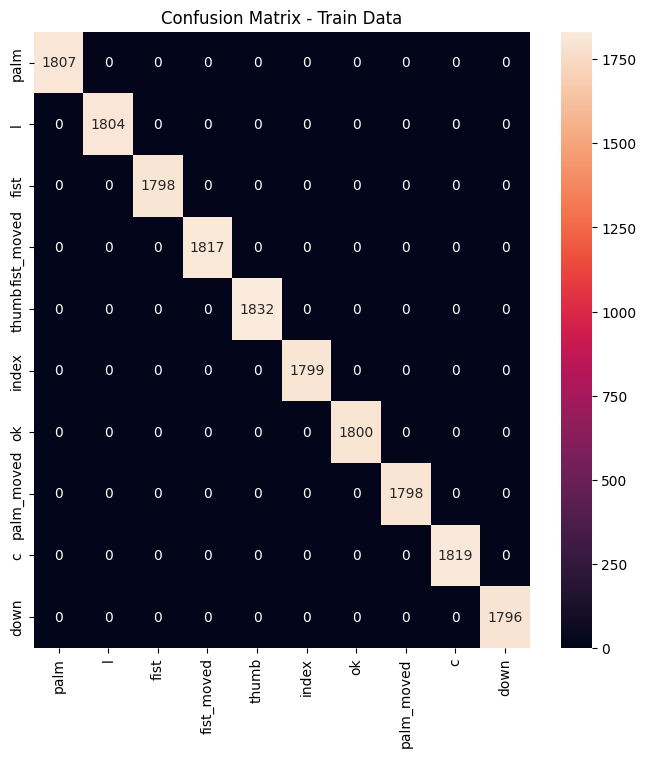

In [19]:
# Confusion Matrix for Train Data
categories = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(8, 8))
cm = confusion_matrix(np.argmax(y_train, axis=1), np.argmax(model.predict(X_train), axis=1))
sn.heatmap(cm, annot=True, fmt='d', xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix - Train Data')
plt.show()